## Density-based Cluster

The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points. There are two importantparameters, "eps" defines the radius of neighborhood of each point and "minpts" is the number of neighbors within any "eps" radius. The algorithm works as below.

* First scan: For each point, compute the distance with all other points. Increment a neighbor count if the distance is smaller than "eps".

* Second scan: For each point, mark it as a core point if its neighbor count is greater than "minpts"

* Third scan: For each core point, if it is not already assigned a cluster, create a new cluster and assign that to this core point as well as all of its neighbors within "eps" radius.

Unlike other cluster, density based cluster can have some outliers (data points that doesn't belong to any clusters). On the other hand, it can detect clusters of arbitrary shapes. Clusters doesn't have to be circular at all. 

The figure below shows the different types of points (core, border and outlier points) using MinPts = 6. Here x is a core point because neighboursϵ(x)=6neighboursϵ(x)=6, y is a border point because neighboursϵ(y)<MinPtsneighboursϵ(y)<MinPts, but it belongs to the ϵϵ-neighborhood of the core point x. Finally, z is a noise point.

<img src="../images/dbscan-principle.png">

In [1]:
# The function dbscan() in fpc package can be used to perform density based clustering
# Load the data 

data("multishapes", package = "factoextra")
df <- multishapes[, 1:2]

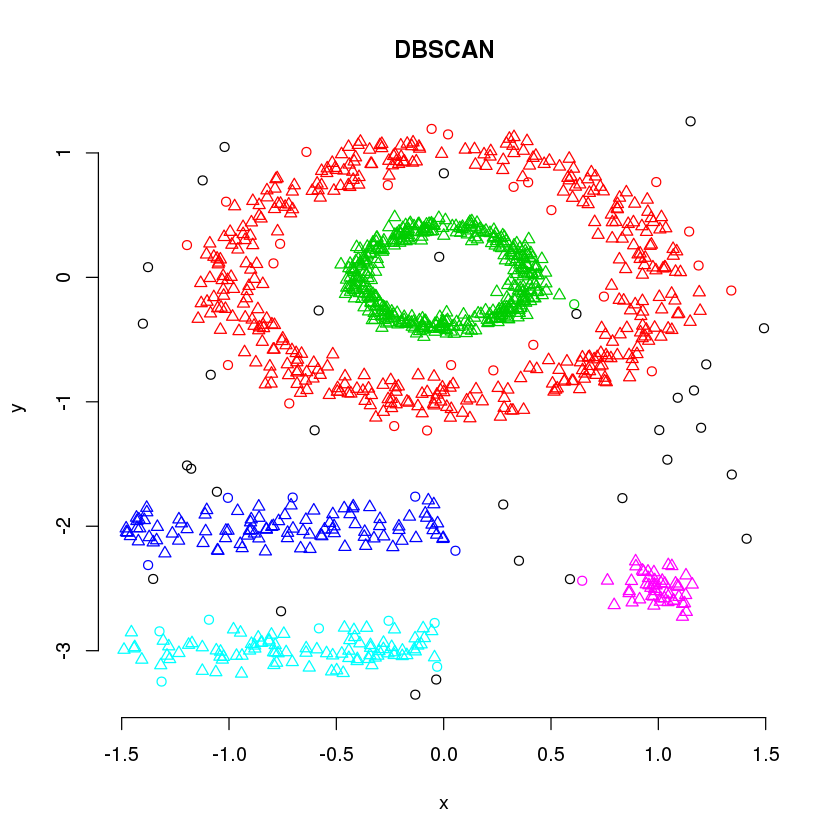

In [3]:
# Apply kmeans clustering algorithm on df using a number of clusters as 6.
km.fit = kmeans(df,6,nstart = 20)

# Clustering results
km.fit

K-means clustering with 6 clusters of sizes 275, 108, 294, 102, 60, 261

Cluster means:
           x           y
1 -0.3617742 -0.49181836
2 -0.7703204 -2.00640507
3  0.5908264 -0.08423474
4 -0.6581122 -2.99161887
5  0.9768879 -2.38945886
6 -0.2752881  0.52584306

Clustering vector:
   [1] 1 3 3 1 3 3 6 1 1 1 1 1 1 1 3 1 6 1 6 3 1 6 1 3 6 1 6 6 1 6 3 1 1 1 1 6 6
  [38] 6 1 1 3 1 6 1 1 6 6 1 6 6 6 6 6 1 6 3 3 1 3 6 3 3 6 6 1 3 1 3 3 3 6 6 6 3
  [75] 3 6 1 6 6 1 1 6 1 6 3 6 1 1 6 6 6 1 3 3 1 3 6 3 3 3 6 1 6 1 6 3 1 6 3 1 1
 [112] 1 1 3 1 3 1 6 3 6 6 1 3 3 3 1 1 6 1 3 3 6 1 6 6 1 1 6 3 6 6 3 3 1 3 1 3 3
 [149] 6 6 1 1 3 1 6 3 1 1 6 6 1 1 1 6 3 6 3 6 6 3 3 1 6 1 3 1 6 3 3 1 1 6 3 3 3
 [186] 3 3 6 3 1 6 6 6 6 3 3 3 6 1 1 3 3 1 3 3 3 3 3 1 6 3 6 3 6 1 3 6 6 1 3 3 3
 [223] 3 3 6 6 3 3 6 1 6 6 1 6 1 1 6 6 3 6 6 3 6 3 3 1 3 3 1 3 3 3 3 3 1 6 3 1 3
 [260] 6 3 6 1 1 1 1 1 1 6 3 6 3 3 3 3 6 3 3 1 1 1 1 6 3 1 3 6 1 6 1 3 6 6 6 3 3
 [297] 6 1 6 6 6 6 1 3 1 1 6 3 6 3 3 6 1 6 1 3 1 3 1 6 1 1 6 6 6 1 3 

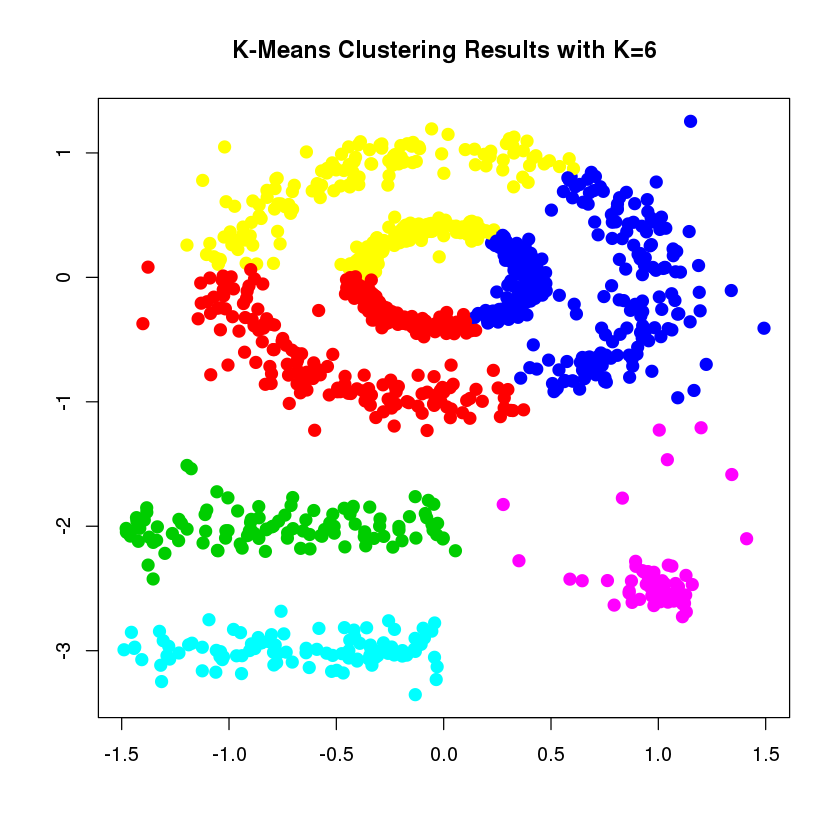

In [4]:
plot(df, col=(km.fit$cluster+1), main="K-Means Clustering Results with K=6", xlab ="", ylab="", pch =20, cex =2)

Compare the results of clustering with K-means and dbscan. You can see from below image that DBSCAN performs better for the dataset and can identify the correct set of clusters compared to k-means algorithms.

<img src="../images/kmeans_and_dbscan.JPG">

In [5]:
# Print DBSCAN
print(db)

dbscan Pts=1100 MinPts=5 eps=0.15
        0   1   2   3  4  5
border 31  24   1   5  7  1
seed    0 386 404  99 92 50
total  31 410 405 104 99 51


In the table above, column names represent the cluster number. Cluster 0 corresponds to outliers whioch are denoted using hollow circles in DBscab graph.

DBSCAN requires the user to specify the optimal values for eps and MinPts parameters. The values used for eps(0.15) and MinPts(5) depends on user. The choice of **ϵ** could be a disadvantage for DBSCAN as it is sensitive to **ϵ** when clusters have different densities. If **ϵ** is too small, sparser clusters will be defined as noise. If **ϵ** is too large, denser clusters may be merged together. So if there are clusters with different local densities, then a single **ϵ** value will not give good results.

#### Determine the optimal eps value

The k-nearest neighbor distances for the matrix of points are calculated where the idea is to calculate, the average of the distances of every point to its k nearest neighbors. The value of k depends upon the user and corresponds to MinPts.

These k-distances are plotted in an ascending order to determine the optimal eps parameter. The function kNNdistplot() in dbscan package is used to draw the k-distance plot.

In [6]:
library(dbscan)


Attaching package: ‘dbscan’

The following object is masked from ‘package:fpc’:

    dbscan



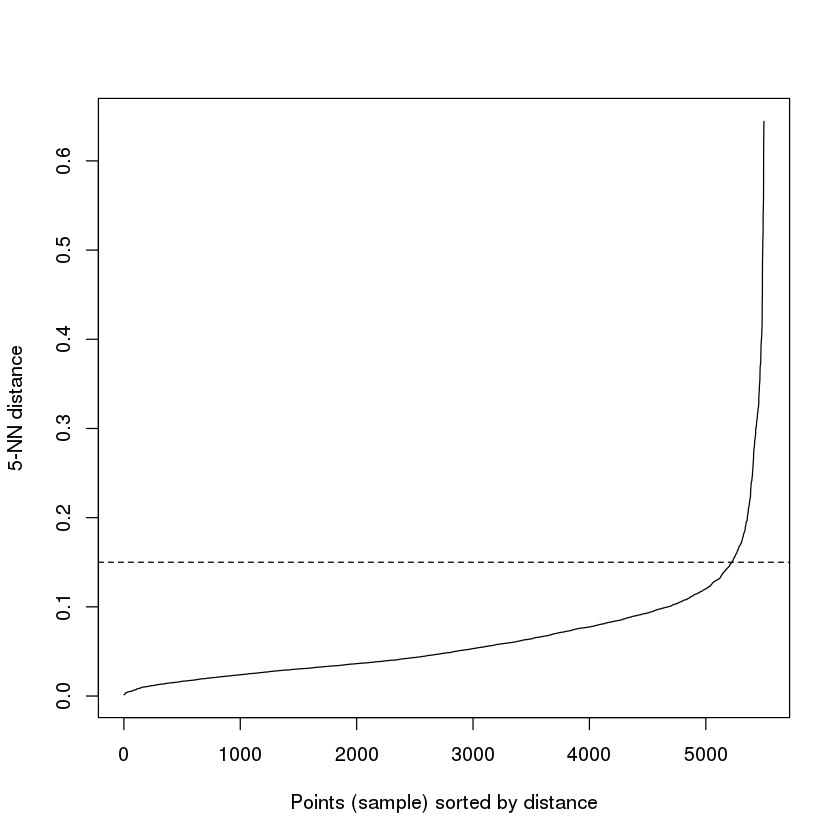

In [7]:
dbscan::kNNdistplot(df, k =  5)
abline(h = 0.15, lty = 2)

It can be seen that the optimal eps value is around a distance of 0.15.